In [1]:
import numpy as np
import matplotlib.pyplot as plt
from proj_1_module import dynamics_solve, hamiltonian_solve

## 1. Simple Population Model

\begin{align}
    \dot P(t) = (B - D) P(t), \qquad P(0) = P_0
\end{align}

In [2]:
# Analytical Solution
def exp(t):
    B = 5
    D = 3
    P0 = 1
    return P0 * np.exp((B-D)*t)

# Initial conditions for analytic solution to population model
t0 = 0.0
STEP_SIZE = 0.1
NUM_STEPS = 100
times = np.array([t0 + n * STEP_SIZE for n in range(NUM_STEPS + 1)])

# Analytic solution
analytical_model = exp(times)

### 1.1 Tests for Euler's Method

Text(0.5, 1.0, 'Population Model (Plot 1)')

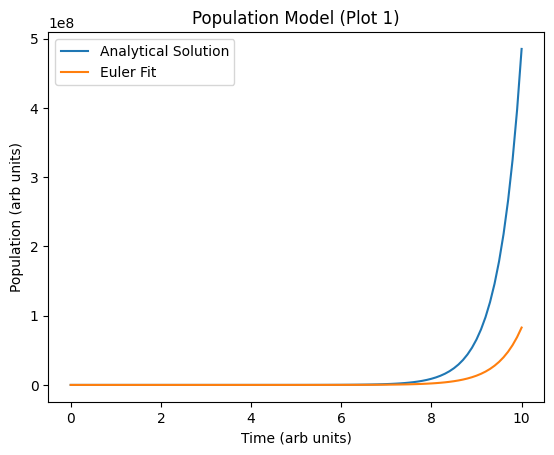

In [3]:
# Population Model

# Define P dot function
def f(t, P):
    B = 5
    D = 3
    return (B - D)*P

# Call dynamics_solve using default step size
euler_model = dynamics_solve(f)

# Plot results
plt.plot(times, analytical_model, label='Analytical Solution')
plt.plot(euler_model[0], euler_model[1], label = 'Euler Fit')
plt.xlabel('Time (arb units)')
plt.ylabel('Population (arb units)')
plt.legend()
plt.title('Population Model (Plot 1)')

We notice that in Plot 1 shown above, that the solution from the Euler method signficantly diverges from the analytical solution. To try and get this method to produce a better fit, we shall decrease the step size to h = 1e-4 and raise the number of steps to N = 1e5 to maintain the condition that h * n = 10.

Text(0.5, 1.0, 'Population Model (Plot 2)')

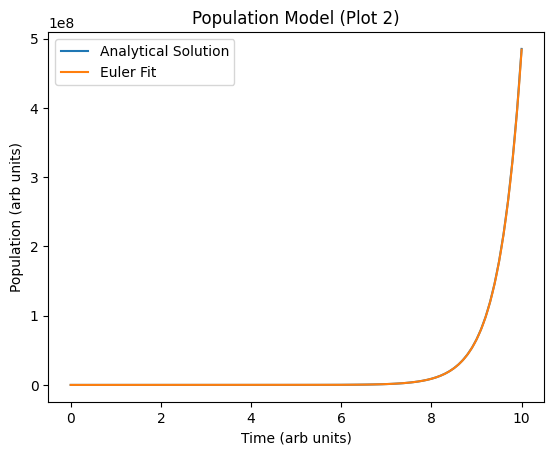

In [4]:
euler_model = dynamics_solve(f, t_0=t0, h=1e-4, N=int(1e5))

# Plot results
plt.plot(times, analytical_model, label='Analytical Solution')
plt.plot(euler_model[0], euler_model[1], label = 'Euler Fit')
plt.xlabel('Time (arb units)')
plt.ylabel('Population (arb units)')
plt.legend()
plt.title('Population Model (Plot 2)')

In Plot 2, the Euler method produces an identical fit to the analytical solution. This was achieved using a smaller step size. Here, "sufficiently small" means that the amount it takes the current popouation rate of change to change the population by a significant fraction of the current population. Here, we can use a time scale of the step size when the population less than doubles with each step. When the step size is small compared to this time scale, the simulations work well.

### 1.2 Tests for RK2 Method

Text(0.5, 1.0, 'Population Model (Plot 1)')

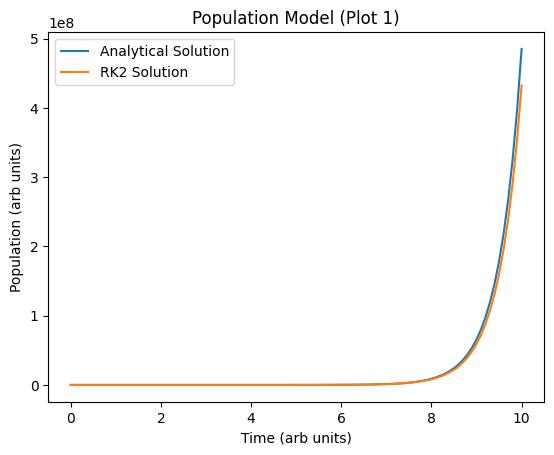

In [5]:
rk2_model = dynamics_solve(f, method='RK2')

# Plot results
plt.plot(times, analytical_model, label='Analytical Solution')
plt.plot(rk2_model[0], rk2_model[1], label='RK2 Solution')
plt.xlabel('Time (arb units)')
plt.ylabel('Population (arb units)')
plt.legend()
plt.title('Population Model (Plot 1)')

Text(0.5, 1.0, 'Population Model (Plot 2)')

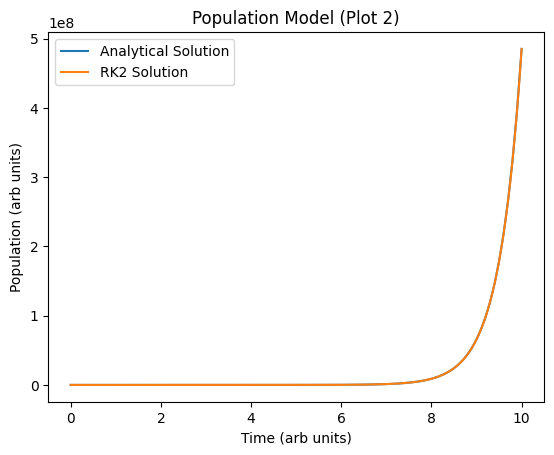

In [6]:
rk2_model = dynamics_solve(f, h=1e-3, N=int(1e4), method='RK2')

# Plot results
plt.plot(times, analytical_model, label='Analytical Solution')
plt.plot(rk2_model[0], rk2_model[1], label='RK2 Solution')
plt.xlabel('Time (arb units)')
plt.ylabel('Population (arb units)')
plt.legend()
plt.title('Population Model (Plot 2)')

### 1.3 Tests for RK4 Method

Text(0.5, 1.0, 'Population Model')

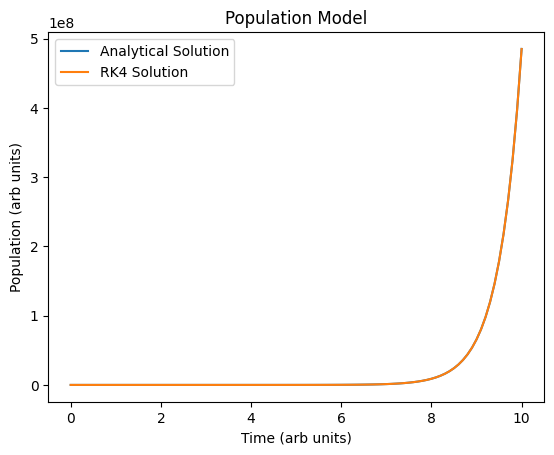

In [7]:
rk4_model = dynamics_solve(f, method='RK4')

# Plot results
plt.plot(times, analytical_model, label='Analytical Solution')
plt.plot(rk4_model[0], rk4_model[1], label='RK4 Solution')
plt.xlabel('Time (arb units)')
plt.ylabel('Population (arb units)')
plt.legend()
plt.title('Population Model')

## 2. Classical Simple Harmonic Oscillator (SHO)

\begin{align}
    H(p,q) = \frac{p^2}{2m} + \frac{1}{2}m\omega^2q^2
\end{align}

EOM (Equations of motion) are:

\begin{align}
    q(t) = q_0 cos(\omega(t-t_0)) + \frac{p_0}{m\omega}sin(\omega(t-t_0)) \\

    p(t) = p_0 cos(\omega(t-t_0)) -m\omega x_0 sin(\omega(t-t_0))
\end{align}

In [21]:
# SHO Hamiltonian
def sho_hamiltonian(t, t_0, q_0, p_0):
    m = 5 #kg
    w = 3 #N/m
    q = (q_0 * np.cos(w*(t-t_0))) + ((p_0/(m*w)) * np.sin(w*(t-t_0)))
    p = (p_0 * np.cos(w*(t-t_0))) - ((m*w*q_0) * np.sin(w*(t-t_0)))
    return ((p**2)/(2*m)) + ((m/2)*(w**2)*(q**2))

def sho_position(t, t_0, q_0, p_0):
    m = 5 #kg
    w = 3 #N/m
    q = (q_0 * np.cos(w*(t-t_0))) + ((p_0/(m*w)) * np.sin(w*(t-t_0)))
    return q

# Initial solutions for analytic solution to classical SHO
t0 = 0.0
STEP_SIZE = 0.1
NUM_STEPS = 100
times = np.array([t0 + n * STEP_SIZE for n in range(NUM_STEPS + 1)])

# Analytical solution for energy
analytical_model = []
for i in range(len(times)):
    analytical_model.append(sho_hamiltonian(times[i], t_0=t0, q_0=0.0, p_0=1.0))

# Analytical solution for position
analytical_pos = []
for i in range(len(times)):
    analytical_pos.append(sho_position(times[i], t_0=t0, q_0=0.0, p_0=1.0))

In [9]:
# Partial derivatives of Hamiltonian
def dh_dq(p, q):
    m = 5 #kg
    w = 3 #N/m
    return m*(w**2)*q

def dh_dp(p, q):
    m = 5 #kg
    w = 3 #N/m
    return p/m

# Specify mass and frequency for numerical solutions
m = 5 #kg
w = 3 #N/m

# Calculate period
PERIOD = (2*np.pi)/w
print(f'Period of motion:', '%.3f' % PERIOD, 'rad/s')

Period of motion: 2.094 rad/s


### 2.1 Testing Methods for Change in Position and Energy

### 2.1.1.1 Euler Method: Change in Position

Text(0.5, 1.0, 'Position of SHO')

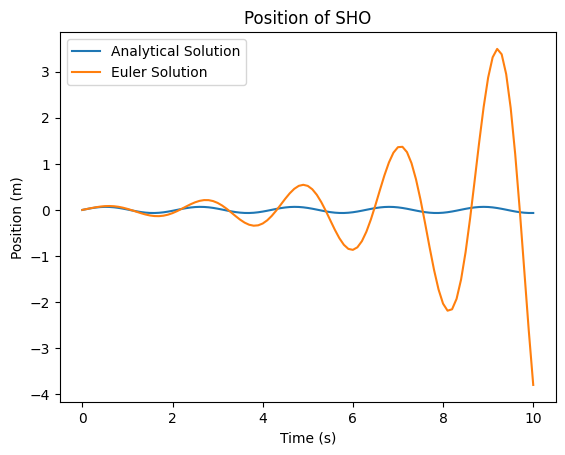

In [26]:
euler_pos_model = hamiltonian_solve(dh_dq, dh_dp)
euler_times = euler_pos_model[0]
euler_pos = euler_pos_model[1]

plt.plot(times, analytical_pos, label='Analytical Solution')
plt.plot(euler_times, euler_pos, label='Euler Solution')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.legend()
plt.title('Position of SHO (Plot 1)')

Using the default values of step size and number of steps, the Euler method signficantly diverges from the analytical solution. To try and and make the numerical solution close to the exact solution, we shall make the step size h sufficiently small relative to the period.

Text(0.5, 1.0, 'Position of SHO')

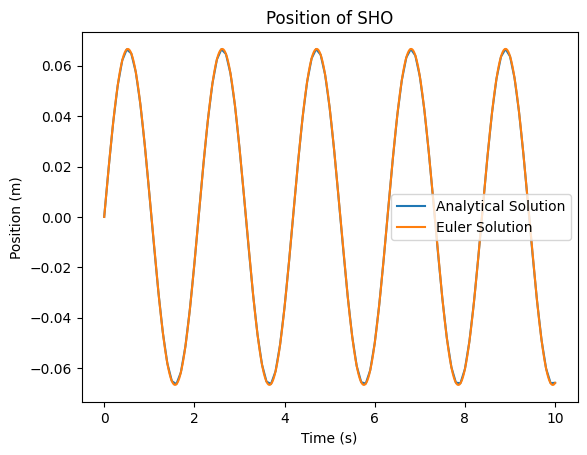

In [25]:
euler_pos_model = hamiltonian_solve(dh_dq, dh_dp, h=1e-5, N=int(1e6))
euler_times = euler_pos_model[0]
euler_pos = euler_pos_model[1]

plt.plot(times, analytical_pos, label='Analytical Solution')
plt.plot(euler_times, euler_pos, label='Euler Solution')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.legend()
plt.title('Position of SHO (Plot 2)')

### 2.1.1.2 Euler Method: Change in Energy

Text(0.5, 1.0, 'Energy of SHO (Plot 1)')

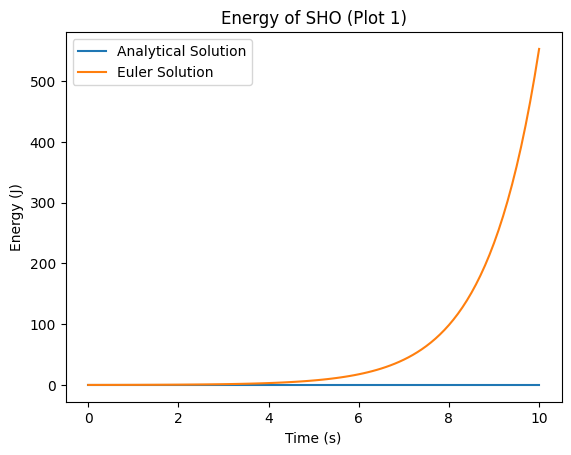

In [11]:
euler_model = hamiltonian_solve(dh_dq, dh_dp)
euler_H = ((euler_model[2]**2)/(2*m)) + ((m/2)*(w**2)*(euler_model[1]**2))

plt.plot(times, analytical_model, label='Analytical Solution')
plt.plot(times, euler_H, label='Euler Solution')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Energy (J)')
plt.title('Energy of SHO (Plot 1)')

Using the default values of step size and number of steps, the Euler method signficantly diverges from the analytical solution. To try and and make the numerical solution close to the exact solution, we shall make the step size h sufficiently small relative to the period.

Text(0.5, 1.0, 'Energy of SHO (Plot 2)')

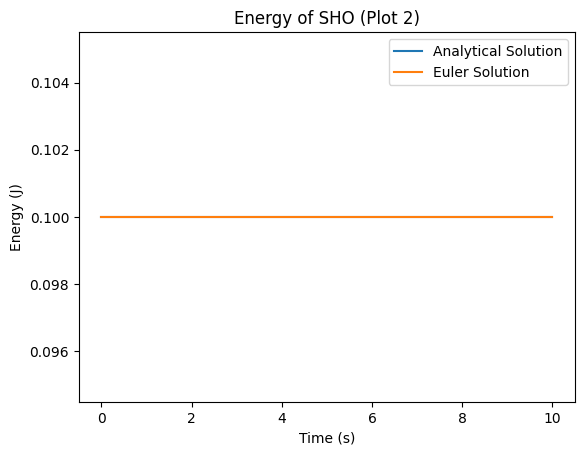

In [12]:
euler_model = hamiltonian_solve(dh_dq, dh_dp, h=1e-11)
euler_H = ((euler_model[2]**2)/(2*m)) + ((m/2)*(w**2)*(euler_model[1]**2))

plt.plot(times, analytical_model, label='Analytical Solution')
plt.plot(times, euler_H, label='Euler Solution')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Energy (J)')
plt.title('Energy of SHO (Plot 2)')

### 2.1.2.1 RK2 Method: Change in Position

Text(0.5, 1.0, 'Position of SHO')

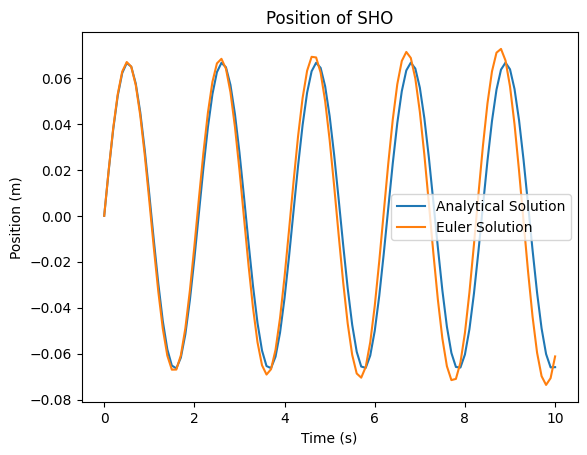

In [28]:
rk2_pos_model = hamiltonian_solve(dh_dq, dh_dp, method='RK2')
rk2_times = rk2_pos_model[0]
rk2_pos = rk2_pos_model[1]

plt.plot(times, analytical_pos, label='Analytical Solution')
plt.plot(rk2_times, rk2_pos, label='RK2 Solution')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.legend()
plt.title('Position of SHO (Plot 1)')

Text(0.5, 1.0, 'Position of SHO (Plot 2)')

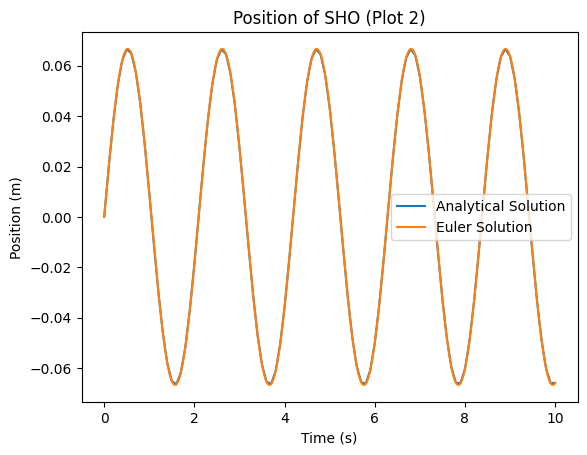

In [31]:
rk2_pos_model = hamiltonian_solve(dh_dq, dh_dp, h=1e-4, N=int(1e5), method='RK2')
rk2_times = rk2_pos_model[0]
rk2_pos = rk2_pos_model[1]

plt.plot(times, analytical_pos, label='Analytical Solution')
plt.plot(rk2_times, rk2_pos, label='RK2 Solution')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.legend()
plt.title('Position of SHO (Plot 2)')

### 2.1.2.2 RK2 Method: Change in Energy

Text(0.5, 1.0, 'Energy of SHO (Plot 1)')

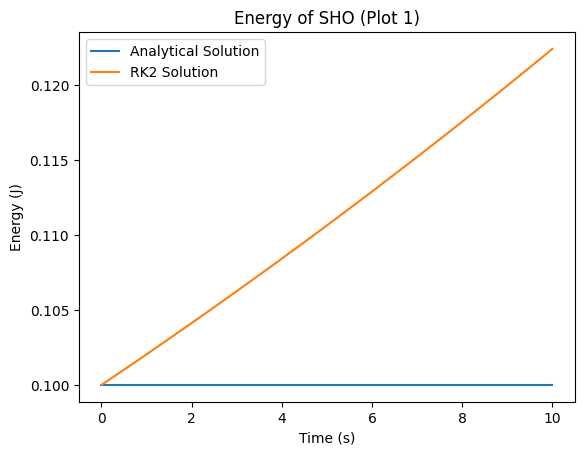

In [13]:
rk2_model = hamiltonian_solve(dh_dq, dh_dp, method='RK2')
rk2_H = ((rk2_model[2]**2)/(2*m)) + ((m/2)*(w**2)*(rk2_model[1]**2))

plt.plot(times, analytical_model, label='Analytical Solution')
plt.plot(times, rk2_H, label='RK2 Solution')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Energy (J)')
plt.title('Energy of SHO (Plot 1)')

Text(0.5, 1.0, 'Energy of SHO (Plot 2)')

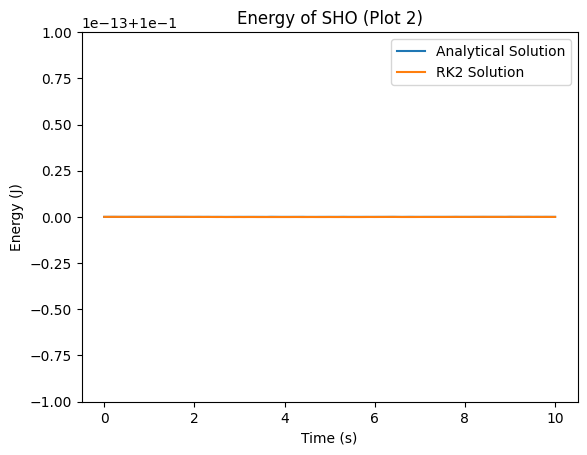

In [14]:
rk2_model = hamiltonian_solve(dh_dq, dh_dp, h=1e-5, method='RK2')
rk2_H = ((rk2_model[2]**2)/(2*m)) + ((m/2)*(w**2)*(rk2_model[1]**2))

plt.plot(times, analytical_model, label='Analytical Solution')
plt.plot(times, rk2_H, label='RK2 Solution')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Energy (J)')
plt.title('Energy of SHO (Plot 2)')

### 2.1.3.1 RK4 Method: Change in Position

Text(0.5, 1.0, 'Position of SHO (Plot 1)')

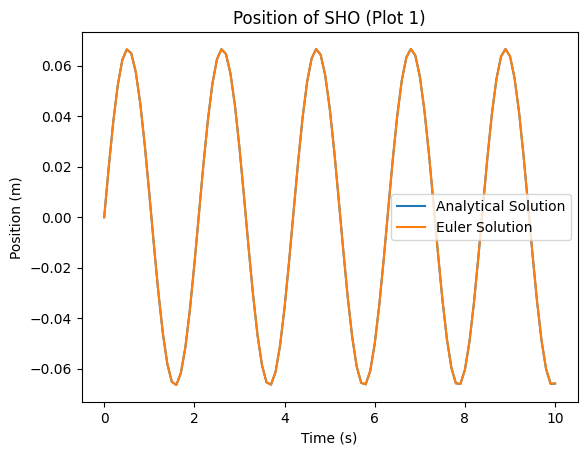

In [34]:
rk4_pos_model = hamiltonian_solve(dh_dq, dh_dp, method='RK4')
rk4_times = rk4_pos_model[0]
rk4_pos = rk4_pos_model[1]

plt.plot(times, analytical_pos, label='Analytical Solution')
plt.plot(rk4_times, rk4_pos, label='RK4 Solution')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.legend()
plt.title('Position of SHO (Plot 1)')

Text(0.5, 1.0, 'Position of SHO (Plot 2)')

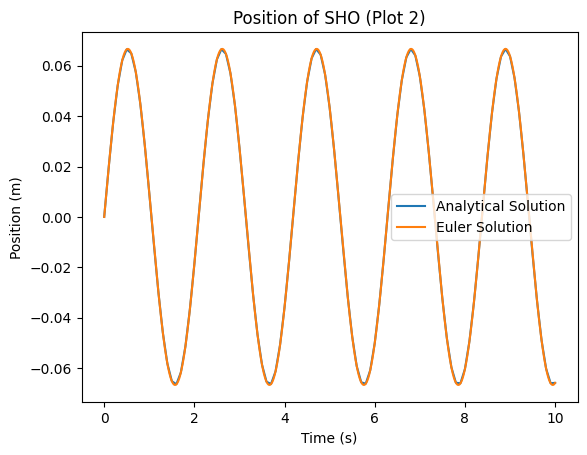

In [33]:
rk4_pos_model = hamiltonian_solve(dh_dq, dh_dp, h=1e-3, N=int(1e4), method='RK4')
rk4_times = rk4_pos_model[0]
rk4_pos = rk4_pos_model[1]

plt.plot(times, analytical_pos, label='Analytical Solution')
plt.plot(rk4_times, rk4_pos, label='RK4 Solution')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.legend()
plt.title('Position of SHO (Plot 2)')

### 2.1.3.2 RK4 Method: Change in Energy

Text(0.5, 1.0, 'Energy of SHO (Plot 1)')

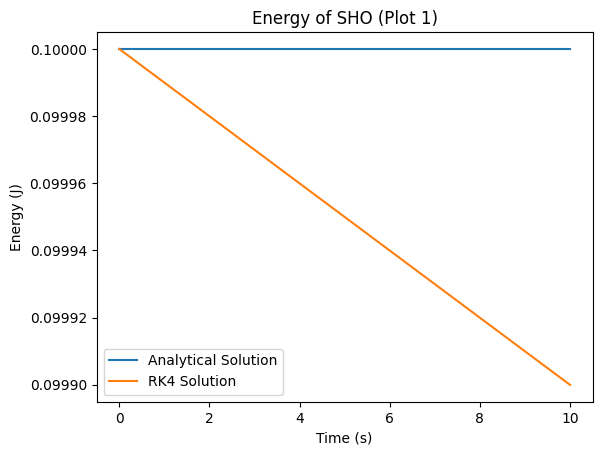

In [15]:
rk4_model = hamiltonian_solve(dh_dq, dh_dp, method='RK4')
rk4_H = ((rk4_model[2]**2)/(2*m)) + ((m/2)*(w**2)*(rk4_model[1]**2))

plt.plot(times, analytical_model, label='Analytical Solution')
plt.plot(times, rk4_H, label='RK4 Solution')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Energy (J)')
plt.title('Energy of SHO (Plot 1)')

Text(0.5, 1.0, 'Energy of SHO (Plot 2)')

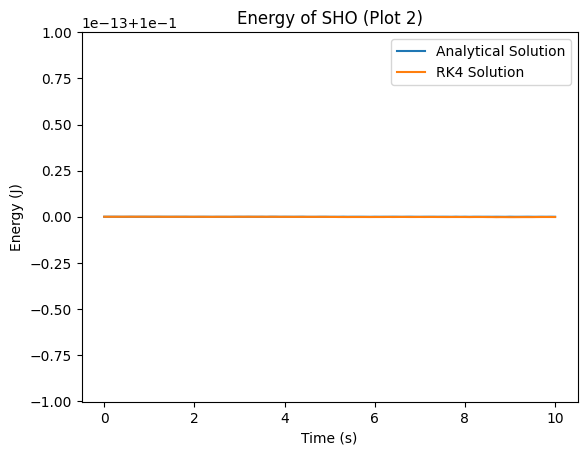

In [16]:
rk4_model = hamiltonian_solve(dh_dq, dh_dp, h=1e-3, method='RK4')
rk4_H = ((rk4_model[2]**2)/(2*m)) + ((m/2)*(w**2)*(rk4_model[1]**2))

plt.plot(times, analytical_model, label='Analytical Solution')
plt.plot(times, rk4_H, label='RK4 Solution')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Energy (J)')
plt.title('Energy of SHO (Plot 2)')

### 2.1.4.1 Sympletctic-Euler (SE) Method: Change in Position

Text(0.5, 1.0, 'Position of SHO (Plot 1)')

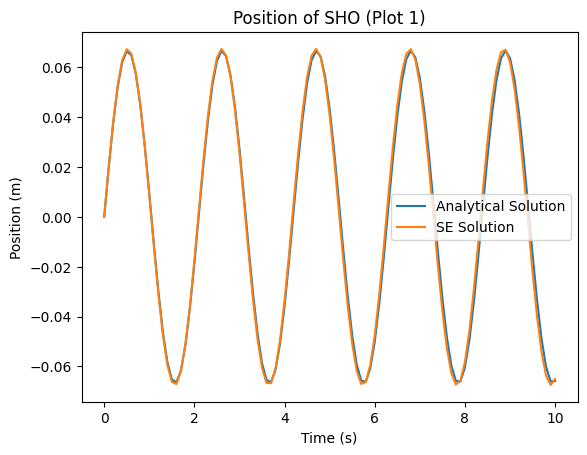

In [35]:
se_pos_model = hamiltonian_solve(dh_dq, dh_dp, method='SE')
se_times = se_pos_model[0]
se_pos = se_pos_model[1]

plt.plot(times, analytical_pos, label='Analytical Solution')
plt.plot(se_times, se_pos, label='SE Solution')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.legend()
plt.title('Position of SHO (Plot 1)')

Text(0.5, 1.0, 'Position of SHO (Plot 2)')

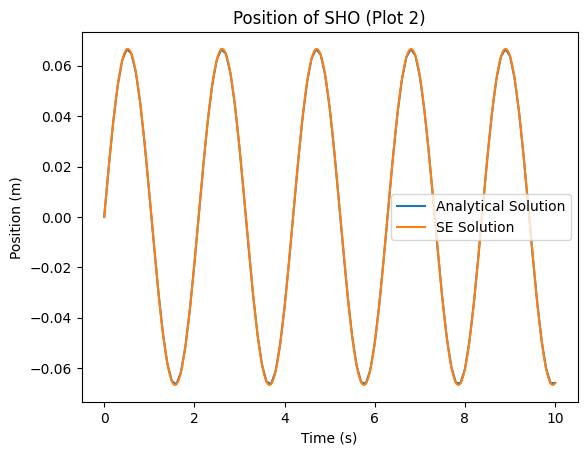

In [36]:
se_pos_model = hamiltonian_solve(dh_dq, dh_dp, h=1e-3, N=int(1e4), method='SE')
se_times = se_pos_model[0]
se_pos = se_pos_model[1]

plt.plot(times, analytical_pos, label='Analytical Solution')
plt.plot(se_times, se_pos, label='SE Solution')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.legend()
plt.title('Position of SHO (Plot 2)')

### 2.1.4.2 Sympletctic-Euler (SE) Method: Change in Energy

Text(0.5, 1.0, 'Energy of SHO (Plot 1)')

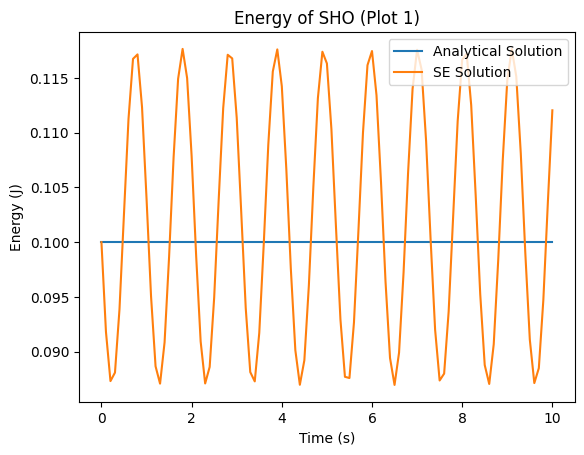

In [17]:
se_model = hamiltonian_solve(dh_dq, dh_dp, method='SE')
se_H = ((se_model[2]**2)/(2*m)) + ((m/2)*(w**2)*(se_model[1]**2))

plt.plot(times, analytical_model, label='Analytical Solution')
plt.plot(times, se_H, label='SE Solution')
plt.legend(loc='upper right')
plt.xlabel('Time (s)')
plt.ylabel('Energy (J)')
plt.title('Energy of SHO (Plot 1)')

Text(0.5, 1.0, 'Energy of SHO (Plot 2)')

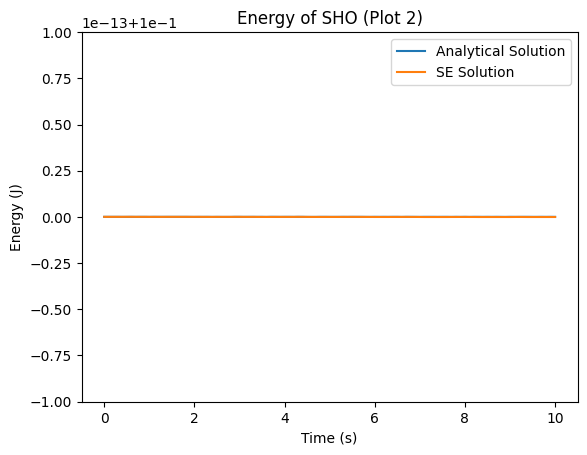

In [18]:
se_model = hamiltonian_solve(dh_dq, dh_dp, h=1e-9, method='SE')
se_H = ((se_model[2]**2)/(2*m)) + ((m/2)*(w**2)*(se_model[1]**2))

plt.plot(times, analytical_model, label='Analytical Solution')
plt.plot(times, se_H, label='SE Solution')
plt.legend(loc='upper right')
plt.xlabel('Time (s)')
plt.ylabel('Energy (J)')
plt.title('Energy of SHO (Plot 2)')

### 2.1.5.1 Stormer-Verlet (SV) Method: Change in Position

Text(0.5, 1.0, 'Position of SHO (Plot 2)')

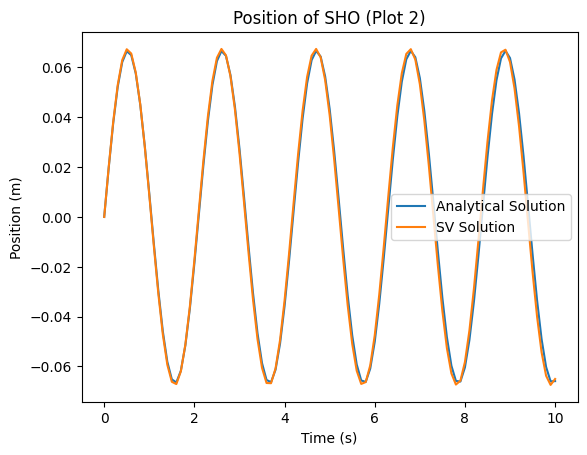

In [37]:
sv_pos_model = hamiltonian_solve(dh_dq, dh_dp, method='SV')
sv_times = sv_pos_model[0]
sv_pos = sv_pos_model[1]

plt.plot(times, analytical_pos, label='Analytical Solution')
plt.plot(sv_times, sv_pos, label='SV Solution')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.legend()
plt.title('Position of SHO (Plot 2)')

Text(0.5, 1.0, 'Position of SHO (Plot 2)')

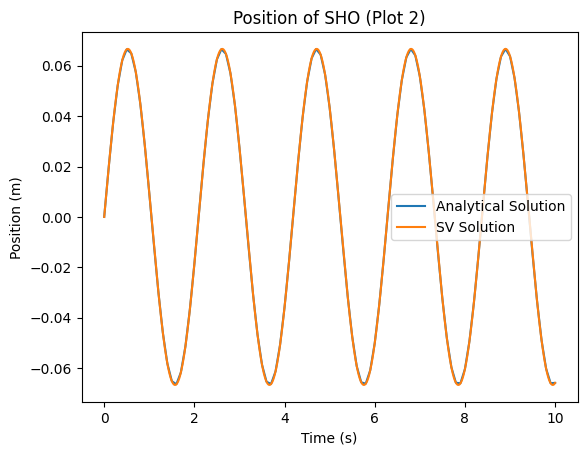

In [38]:
sv_pos_model = hamiltonian_solve(dh_dq, dh_dp, h=1e-3, N=int(1e4), method='SV')
sv_times = sv_pos_model[0]
sv_pos = sv_pos_model[1]

plt.plot(times, analytical_pos, label='Analytical Solution')
plt.plot(sv_times, sv_pos, label='SV Solution')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.legend()
plt.title('Position of SHO (Plot 2)')

### 2.1.5.2 Stormer-Verlet (SV) Method: Change in Energy

Text(0.5, 1.0, 'Energy of SHO (Plot 2)')

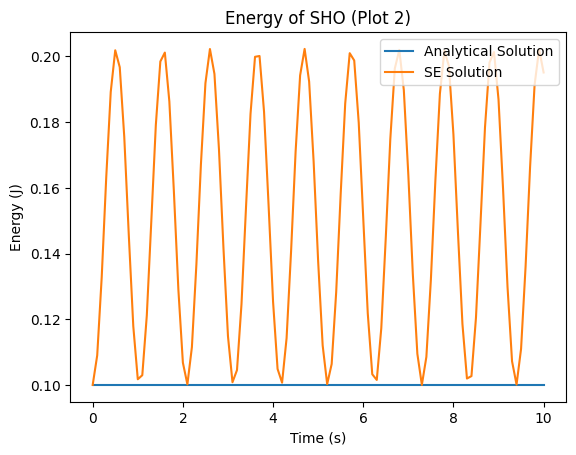

In [40]:
sv_model = hamiltonian_solve(dh_dq, dh_dp, method='SV')
sv_H = ((se_model[2]**2)/(2*m)) + ((m/2)*(w**2)*(sv_model[1]**2))

plt.plot(times, analytical_model, label='Analytical Solution')
plt.plot(times, sv_H, label='SE Solution')
plt.legend(loc='upper right')
plt.xlabel('Time (s)')
plt.ylabel('Energy (J)')
plt.title('Energy of SHO (Plot 2)')

Text(0.5, 1.0, 'Energy of SHO (Plot 2)')

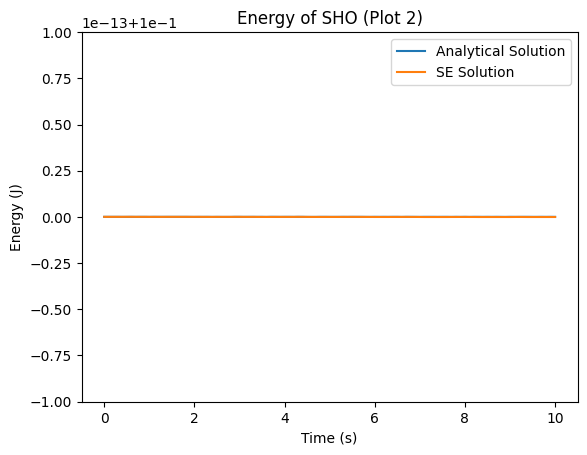

In [41]:
sv_model = hamiltonian_solve(dh_dq, dh_dp, h=1e-9, method='SV')
sv_H = ((se_model[2]**2)/(2*m)) + ((m/2)*(w**2)*(sv_model[1]**2))

plt.plot(times, analytical_model, label='Analytical Solution')
plt.plot(times, sv_H, label='SE Solution')
plt.legend(loc='upper right')
plt.xlabel('Time (s)')
plt.ylabel('Energy (J)')
plt.title('Energy of SHO (Plot 2)')

### 2.2 Deviation from Exact Solution: Position

In [65]:
# We will observe the change in position over a larger number of cycles nowdev
t0 = 0.0
STEP_SIZE = 0.1
NUM_STEPS = 200
dev_times = np.array([t0 + n * STEP_SIZE for n in range(NUM_STEPS + 1)])

# Analytical solution for position
dev_analytical_pos = []
for i in range(len(dev_times)):
    dev_analytical_pos.append(sho_position(times[i], t_0=t0, q_0=0.0, p_0=1.0))

### 2.2.1 Euler Method

Text(0.5, 1.0, 'Position of SHO')

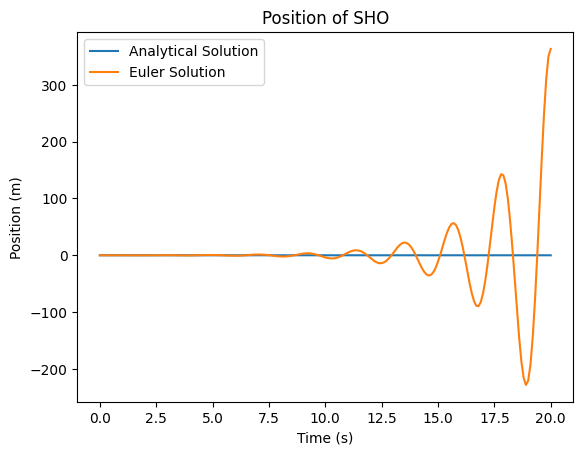

In [70]:
dev_euler_model = hamiltonian_solve(dh_dq, dh_dp, N=200)
dev_euler_times = dev_euler_model[0]
dev_euler_pos = dev_euler_model[1]

plt.plot(dev_times, dev_analytical_pos, label='Analytical Solution')
plt.plot(dev_euler_times, dev_euler_pos, label='Euler Solution')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.legend()
plt.title('Position of SHO')

### 2.2.2 RK2 Method

Text(0.5, 1.0, 'Position of SHO')

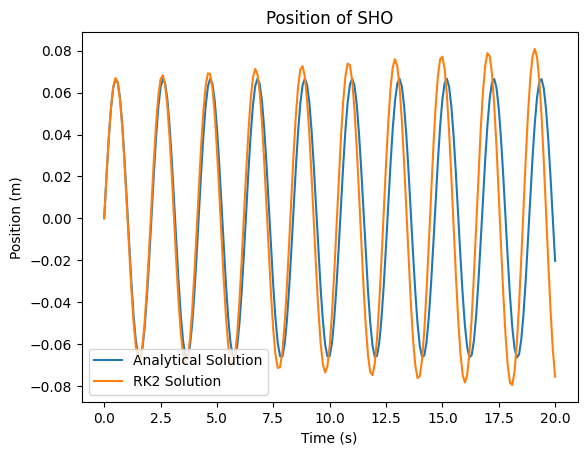

In [68]:
dev_rk2_model = hamiltonian_solve(dh_dq, dh_dp, N=200, method='RK2')
dev_rk2_times = dev_rk2_model[0]
dev_rk2_pos = dev_rk2_model[1]

plt.plot(dev_times, dev_analytical_pos, label='Analytical Solution')
plt.plot(dev_rk2_times, dev_rk2_pos, label='RK2 Solution')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.legend()
plt.title('Position of SHO')

### 2.2.3 RK4 Method

Text(0.5, 1.0, 'Position of SHO')

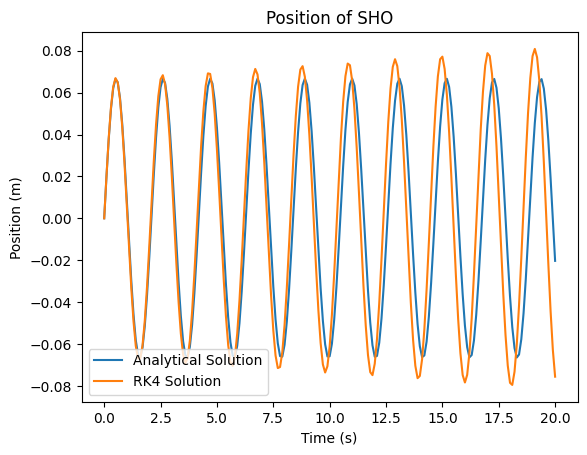

In [69]:
dev_rk4_model = hamiltonian_solve(dh_dq, dh_dp, N=200, method='RK4')
dev_rk4_times = dev_rk4_model[0]
dev_rk4_pos = dev_rk4_model[1]

plt.plot(dev_times, dev_analytical_pos, label='Analytical Solution')
plt.plot(dev_rk2_times, dev_rk2_pos, label='RK4 Solution')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.legend()
plt.title('Position of SHO')

### 2.2.4 SE Method

Text(0.5, 1.0, 'Position of SHO')

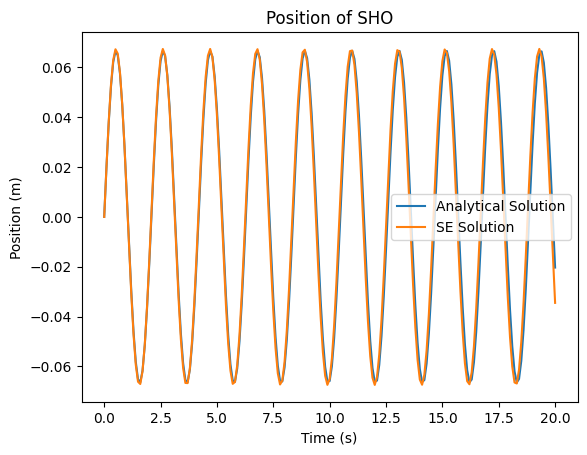

In [71]:
dev_se_model = hamiltonian_solve(dh_dq, dh_dp, N=200, method='SE')
dev_se_times = dev_se_model[0]
dev_se_pos = dev_se_model[1]

plt.plot(dev_times, dev_analytical_pos, label='Analytical Solution')
plt.plot(dev_se_times, dev_se_pos, label='SE Solution')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.legend()
plt.title('Position of SHO')

### 2.2.5 SV Method

Text(0.5, 1.0, 'Position of SHO')

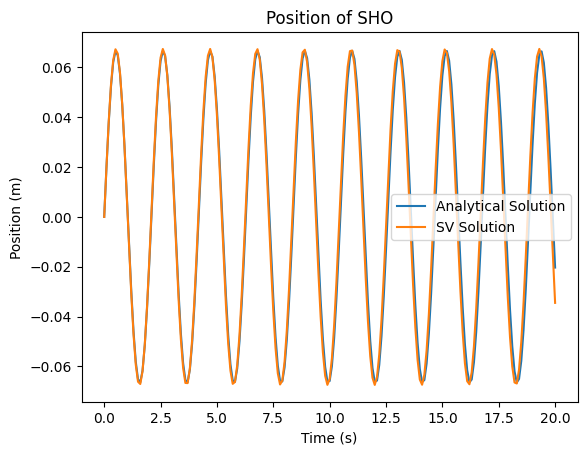

In [72]:
dev_sv_model = hamiltonian_solve(dh_dq, dh_dp, N=200, method='SV')
dev_sv_times = dev_sv_model[0]
dev_sv_pos = dev_sv_model[1]

plt.plot(dev_times, dev_analytical_pos, label='Analytical Solution')
plt.plot(dev_sv_times, dev_sv_pos, label='SV Solution')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.legend()
plt.title('Position of SHO')

When we choose a large enough number of periods, all numerical methods tend to deviate from the analytical solution differently. With the RK methods, the numerical solution tends to oscillate with the amplitude increasing with each cycle and the period decreasing. As expected, the Euler method deviates the quickest, followed by RK2, and then RK4.

With the symplectic methods, the fits are more accurate but still deviate. While the amplitude is the same throughout, the period slightly decreases. SE deviates quicker than SV.

As time evolves, the energy/Hamiltonian of the system should be fixed and does not change with time. This make sense as the Hamiltonian does not explicitly depend on time. This is evidenced by the plots in sections 2.1.1.2, 2.1.2.2, 2.1.3.2, 2.1.4.2, and 2.1.5.2.